# Logarithmic Scale: How to Plot and Actually Understand It
## Why an earthquake of magnitude 9.5 is 5000 times stronger than another with 5.8
<img src='images/bonfire.jpg'></img>
<figcaption style="text-align: center;">
    <strong>
        Photo by 
        <a href='https://www.pexels.com/@skitterphoto?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Skitterphoto</a>
        on 
        <a href='https://www.pexels.com/photo/bonfire-during-sunset-1019472/?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Pexels</a>
    </strong>
</figcaption>

### Introduction

Logarithmic scales may seem so unnatural and unintuitive at first. In fact, when it comes to numbers and amounts, we perceive many things in a logarithmic scale. Don't believe me? Here, check out this simple test:

<img src='images/1.png'></img>

Answer immediately by pointing your finger: 

> Where does 1000 lie in this line?

If, at first, you were tempted to point your finger at somewhere around this area:

<img src='images/2.png'></img>

You are not alone! If you think about it, 1000 is a thousand times smaller than one million. So the correct answer would be choosing a point which lies at 1000th of a distance of 1 and a million:

<img src='images/3.png'></img>

The reason why we think 1000 is much closer to a million than it actually is that we are not used to compare the difference between 1000 and 1000000. So we start to think about it logarithmically. 

> I derived this test from a video from Khan Academy. You can watch it [here](https://www.khanacademy.org/math/algebra-home/alg-exp-and-log/alg-logarithmic-scale/v/logarithmic-scale) for more insight into why.

By the end of this post, you will learn all about logarithmic scales, their difference with linear scales, how to interpret, explain and plot them. We will also look at a few real-life examples where logarithmic scale is used.

### Setup

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as ticker
%config InlineBackend.figure_format = 'retina'

### A Note on Linear Scales

In everyday math, we often use linear scales:

<img src='images/4.png'></img>

In a linear scale, if we move a fixed distance from point A, we add the absolute value of that distance to A. For example, if we want to move from 4 to 10 we add the absolute value of (|10 - 4| = 6) to 4.

So the general idea is that however many times you move a fixed distance from a point, you keep **adding** multiples of that distance:

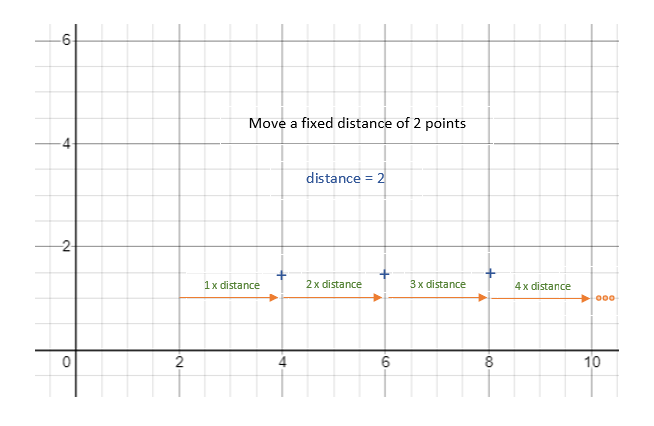

Linear scales or plotting in them will quickly become useless if we want to see the difference between very small and very large numbers. For example, let's imagine you are gathering the information of the distances between exoplanets and the Earth and their radius. You decide to use light years for the distance and kilometers for the radius. 

You find a few planets that generally lies in the range of 10 light years. Then, you find some above 100 and suddenly, your start to find exoplanets that go as far as millions of light years. 

To see their difference visually, you first decide to plot the planets with distances smaller than 100 light years:

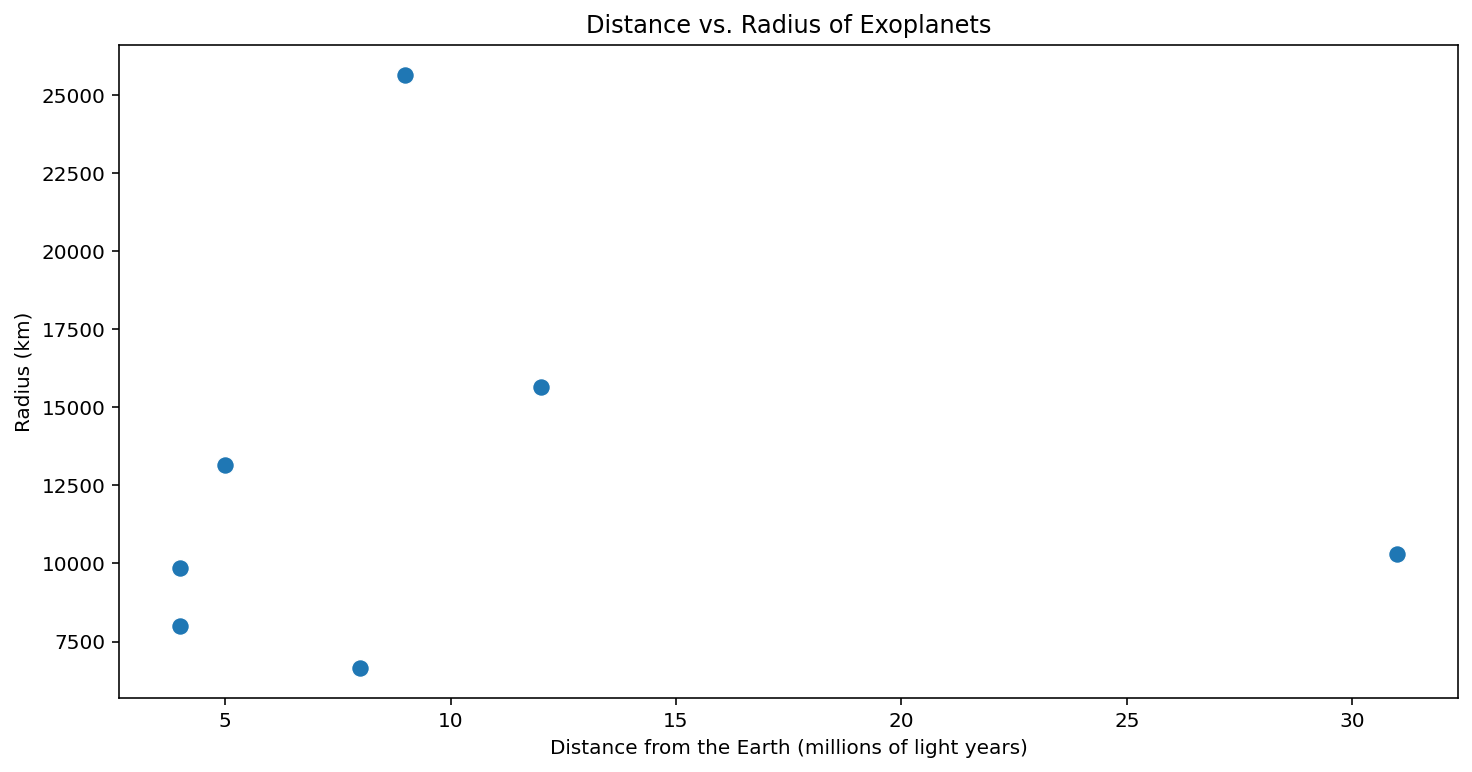

In [2]:
exo_distance = [5, 4, 4, 8, 9, 12, 31]
exo_radius = [13165, 7985, 9847, 6654, 25647, 15644, 10312]

fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(x=exo_distance, y=exo_radius, ax=ax, s=80)
ax.set(title='Distance vs. Radius of Exoplanets',
       xlabel='Distance from the Earth (millions of light years)',
       ylabel='Radius (km)');

Now, you decide to add the planets which are and millions of light years away from the Earth. Watch what happens to your plot:

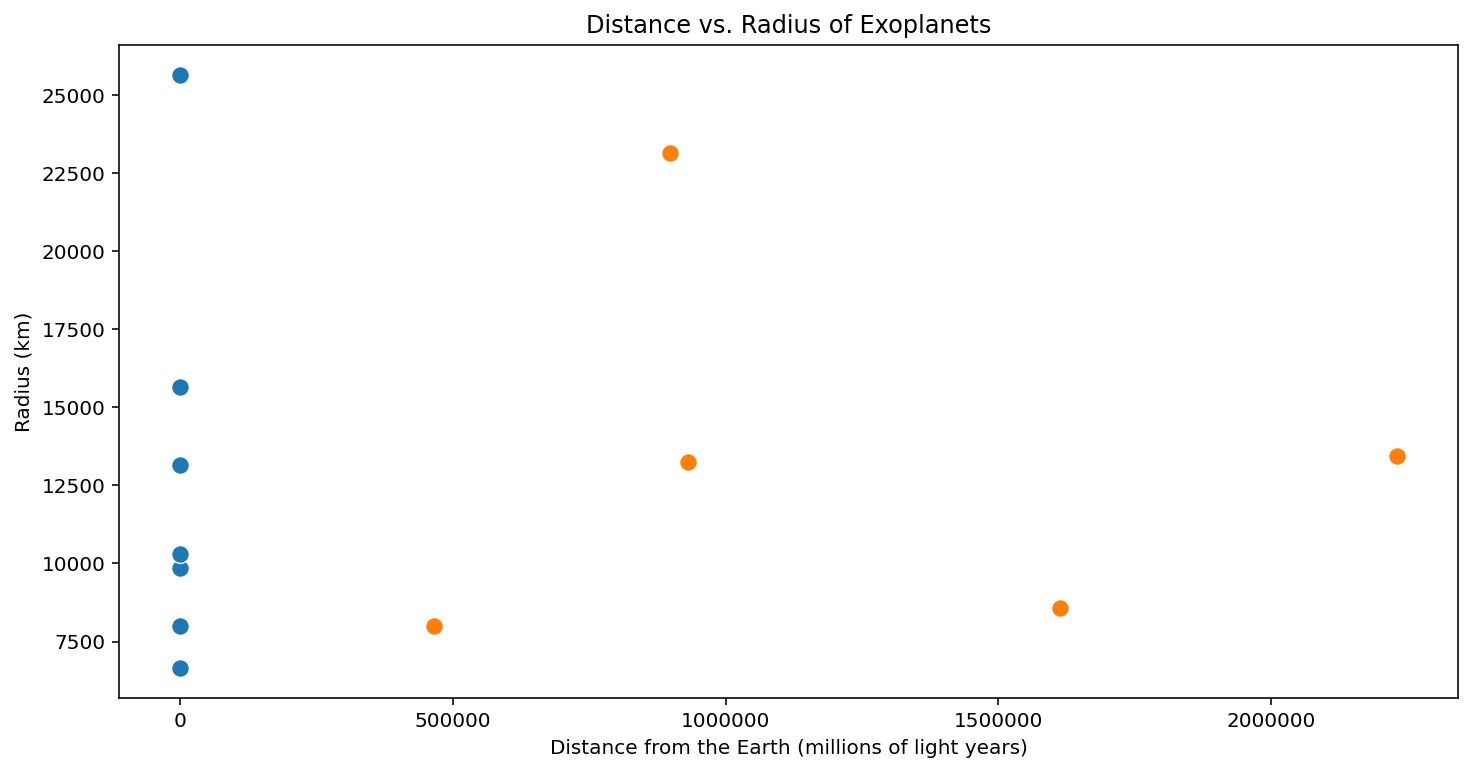

In [3]:
extremes = [465413, 2231451, 897931, 931312, 1612312]
radius_extreme = [7986, 13456, 23144, 13254, 8562]

fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(x=exo_distance, y=exo_radius, ax=ax, s=80)
sns.scatterplot(x=extremes, y=radius_extreme, ax=ax, s=80)
ax.set(title='Distance vs. Radius of Exoplanets',
       xlabel='Distance from the Earth (millions of light years)',
       ylabel='Radius (km)')
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.show();

As you can see, the first group of exoplanets got squished onto a single line. If we wanted to show the real linear difference between each point, we would have run out of space.

Turns out, many things in life follow this pattern. That is why it is common to use logarithmic scales which allow us to compare very small numbers to massive ones without losing or distorting the actual data. In the next section, you will get a fundamental understanding of how to interpret and use logarithmic scales.

### Log Scale: Basic Understanding

In the linear scale, when we moved a fixed distance, we were adding or subtracting a fixed factor to a point. 

In the logarithmic scale, when we move to the right, instead of adding, we **multiply** the starting point by a fixed factor. So if we move twice by a distance of 10, we multiply by 10 twice (I have chosen 10 for simplicity):

<img src='images/6.png'></img>

In other words, as we move, we keep multiplying or dividing by powers of 10.

In the linear scale, the absolute value of the distance and the distance itself was the same, meaning that if we moved by a distance of 2, the distance added two values. In the logarithmic, the absolute or the core value of the distance is not the same as the distance itself. It stays fixed but its value keeps increasing by the powers of the distance.

To instill this idea, think in this way. In our example of exoplanets, to plot every single planet on the plot, we needed a distance of +1,000,000 units to include points above a million. Since we don't have that much space, the plot squished the smaller values onto a single line to fit the extremes. So the distance was the biggest problem. 

But now, if we use a logarithmic scale to plot the exoplanets, we can have an axis with much shorter distance that covers values from 1 to above 1,000,000:

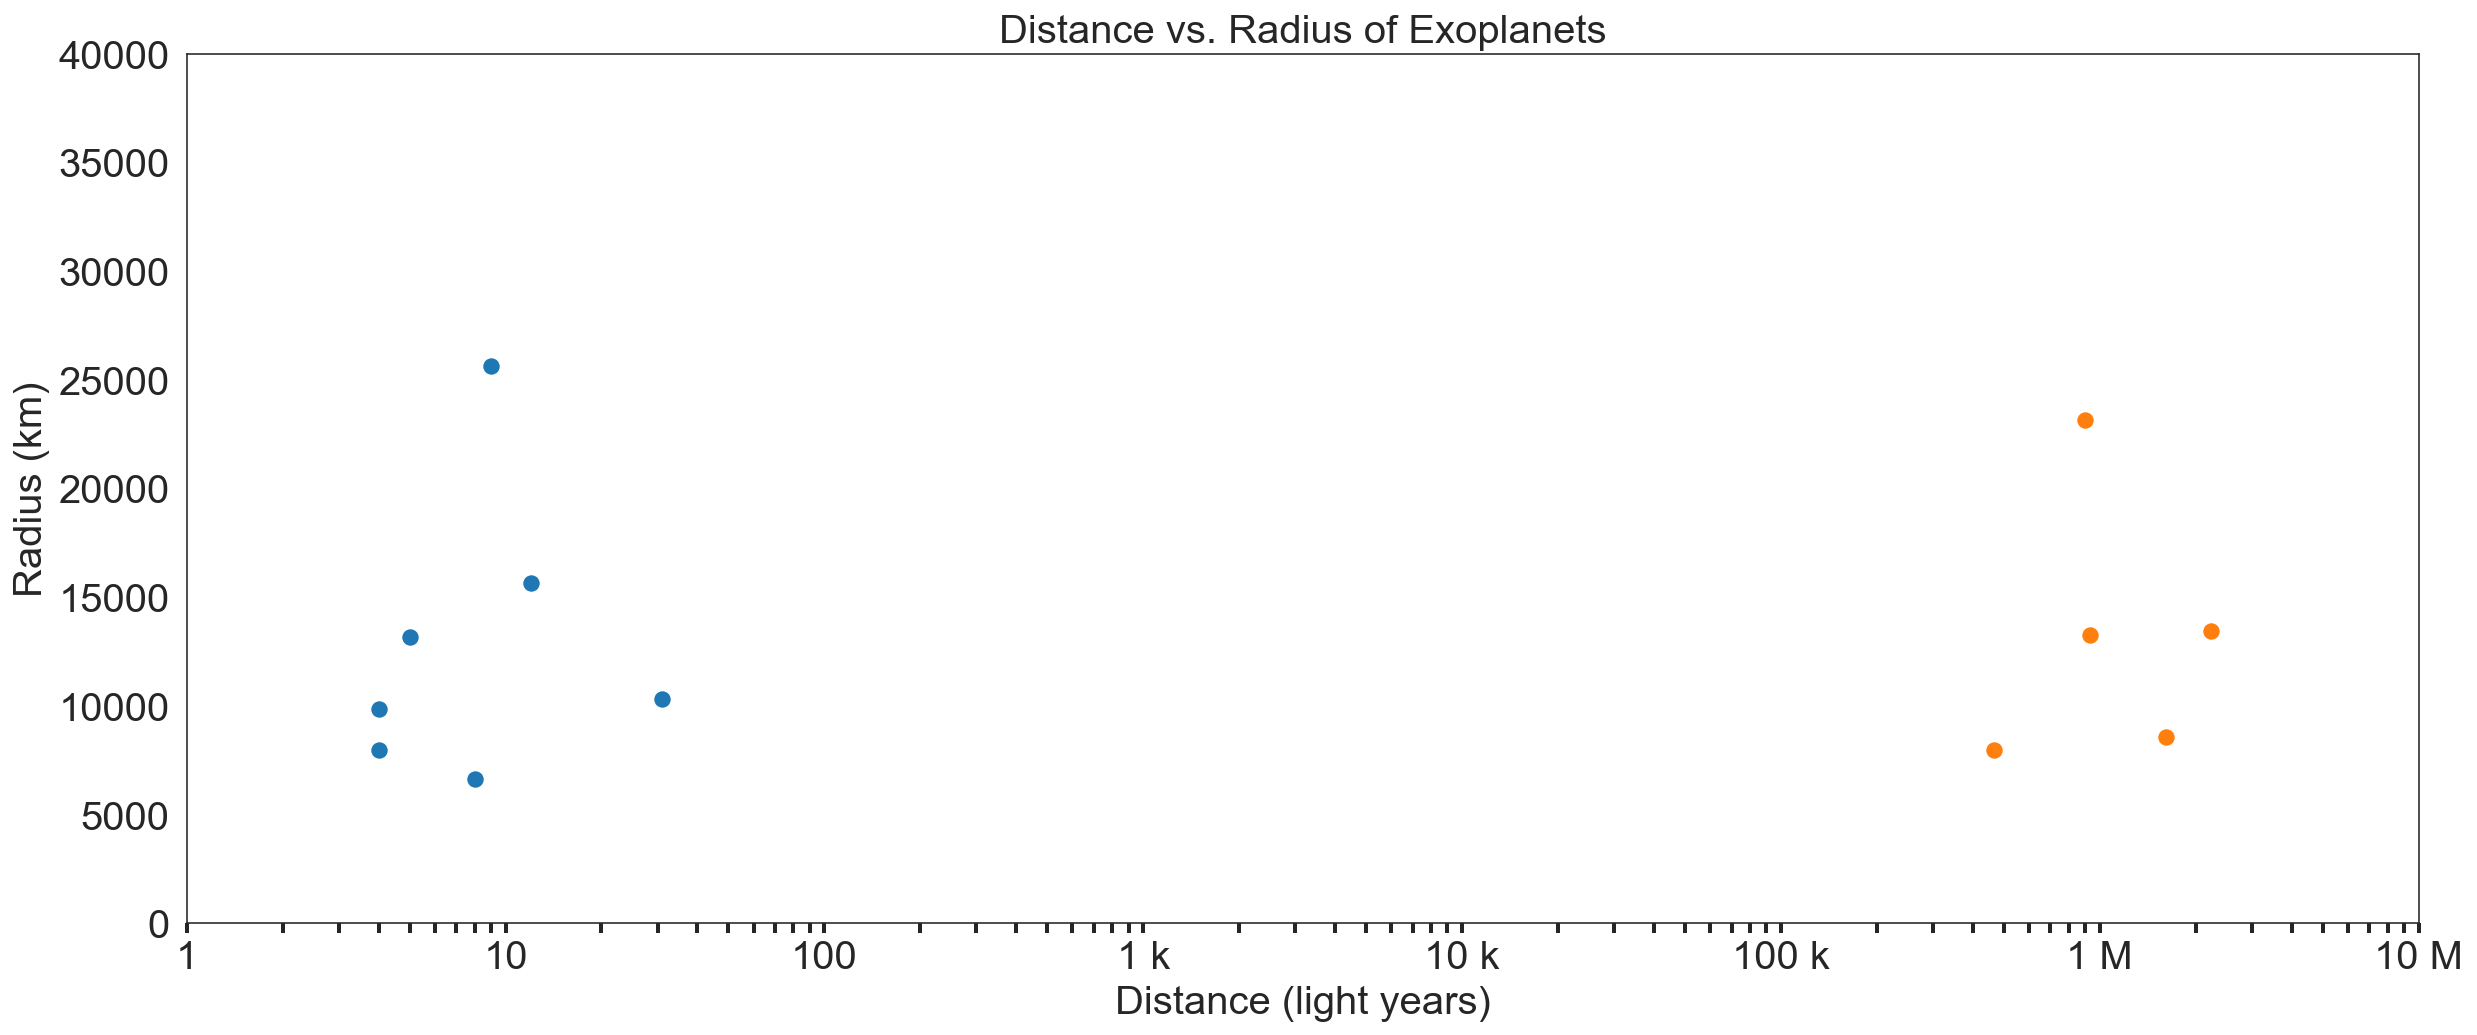

In [18]:
# Create a figure and an axes
fig, ax = plt.subplots(figsize=(20, 8))
# Plot the points
sns.scatterplot(x=exo_distance, y=exo_radius, s=80)
sns.scatterplot(x=extremes, y=radius_extreme, s=80)
# Set axis limits
ax.axis([1, 10000000, 0, 40000])
# Change xaxis to log scale
ax.set_xscale('log')
# Create a formatter to use integer foramtting
formatter = ScalarFormatter()
# Disable Scientific formatting
formatter.set_scientific(False)
# Use scalar formatter on both axes
for axis in [ax.xaxis, ax.yaxis]:
    # Change major ticks
    axis.set_major_formatter(formatter)
# Change the xaxis to K formats
ax.xaxis.set_major_formatter(ticker.EngFormatter())
# Show tick locations for both axes
ax.tick_params(bottom=True, which='both', width=2, length=5, labelsize=20)
# Labelling
ax.set_title('Distance vs. Radius of Exoplanets', fontsize=20)
ax.set_xlabel('Distance (light years)', fontsize=20)
ax.set_ylabel('Radius (km)', fontsize=20)
plt.show();

The above plot does not obscure any data and can easily plot numbers from 1 to 10 million in a much shorter axis length, courtesy of logarithms. 

> Note that I am not showing the code of plots yet, because I don't want to mix the explanation of the code and log scale in a single section. We will see how to plot in log scale in detail in a later section.

Now, you might be thinking, 'where the hell are all the logarithms?'. Well, the logarithm function will come into play when we start asking questions such as:
- How do I plot numbers which are not powers of 10?
- How do I move between two random points in logarithmic line?

Imagine that you put a ruler below your log axis so that 0 cm is directly below 1. In this case, the distance between each point in the logarithmic scale will be 1 cm regardless of the base. For example, in base 10, 1 would be above 0 cm, 10 would above 1 cm, 100 above 2 cm and so on. 

If we change the base, the centimeters or the points on the ruler won't change only the values of the points above. For base 5, 1 will still be 0 cm, 5 will be above 1 cm, 25 above 2 cm, etc.:

<img src='images/12.png'></img> 

Now, we can ask: Where do I plot 40 along the log axis of base 6? In other words, what power do I have to raise 6 to get to 40? I think you know where I am going with this but this basically means what does log-base-6 of 40 equal to?

<img src='images/13.png'></img>

The result is the amount of centimeters you need to move from 0 cm. So, the general formula for the distance between 0 cm and your target number is:

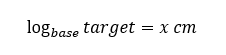

Using the above, we can derive a formula for moving from any random point to another:

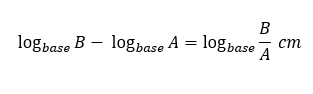

The above formula finds the cm position of point B and subtracts cm position of A which gives the distance between two points. Then, you add the result to cm position of A. For example, without looking at the log scale itself, let's find out how much in centimeters we need to move from 9 to 146 in the log scale with base 8. Using the formula:

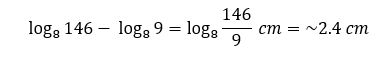

The result is how much in centimeters you need to move from where 9 is positioned along the log axis.

> Think about why we always start log scales from 1. Also, is it possible to plot negative values in a log scale?

In [5]:
sns.set_style('white')

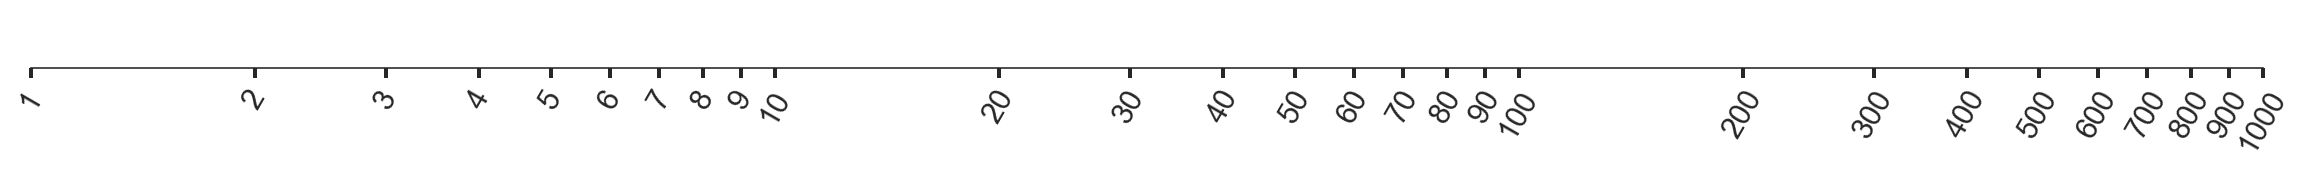

In [6]:
# Create a figure and an axes
fig, ax = plt.subplots(figsize=(20, 0.5))
# Set axis limits
ax.axis([1, 1000, 1, 100])
# Change xaxis to log scale
ax.set_xscale('log')
# Create a formatter to use integer foramtting
formatter = ScalarFormatter()
# Disable Scientific formatting
formatter.set_scientific(False)
# Use scalar formatter on both axes
for axis in [ax.xaxis, ax.yaxis]:
    # Change major ticks
    axis.set_major_formatter(formatter)
    # Change minor ticks
    axis.set_minor_formatter(formatter)
# Clear out the yaxis tick labels
ax.set_yticks([])
# Show tick locations for both axes
ax.tick_params(bottom=True, which='both', width=2, length=5, labelsize=15)
# Rotate all tick labels by 60 degrees
plt.setp(ax.xaxis.get_majorticklabels(), rotation=60)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=60)
# Despine all spines except for bottom
sns.despine(ax=ax, left=True)
fig.savefig('images/linear.png')
plt.show();

### Real-World Example of Log Scale

### Plotting in Log Scale